## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf



In [2]:
dt1=pd.read_csv("NewspaperData.csv")
print(dt1.head(7))


             Newspaper    daily    sunday
0        Baltimore Sun  391.952   488.506
1         Boston Globe  516.981   798.298
2        Boston Herald  355.628   235.084
3   Charlotte Observer  238.555   299.451
4    Chicago Sun Times  537.780   559.093
5      Chicago Tribune  733.775  1133.249
6  Cincinnati Enquirer  198.832   348.744


In [3]:
dt1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [4]:
dt1.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [5]:
dt1.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

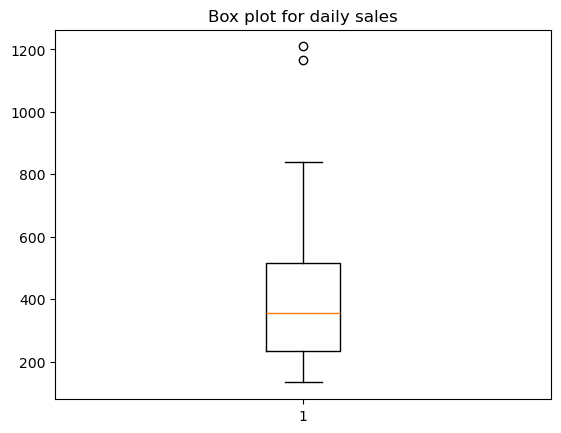

In [6]:
plt.boxplot(dt1["daily"])
plt.title("Box plot for daily sales")

plt.show()

## Observation
 we observed they are `2` outliers for `daily` and `sunday` column


<Axes: xlabel='daily', ylabel='Count'>

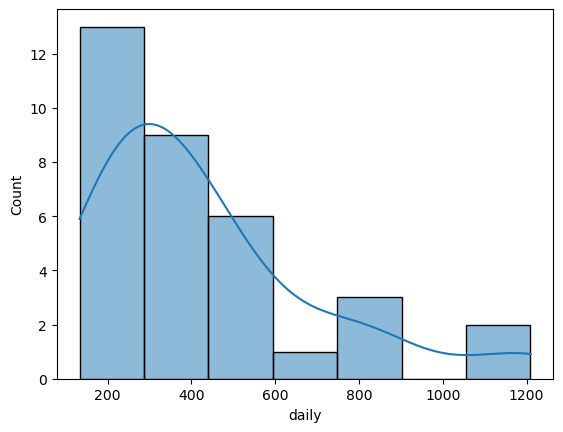

In [7]:
sns.histplot(dt1["daily"],kde=True)


<Axes: xlabel='sunday', ylabel='Density'>

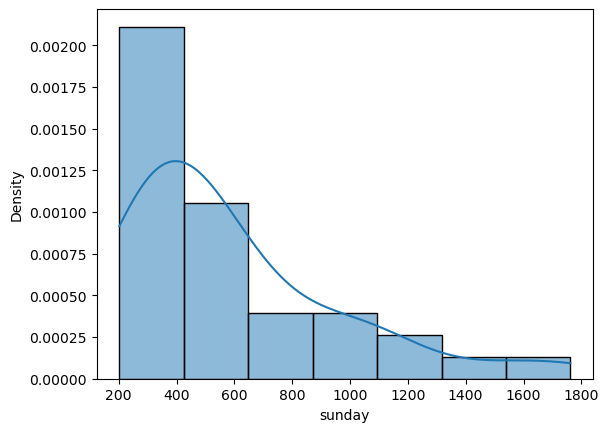

In [8]:
sns.histplot(dt1["sunday"],kde=True,stat='density')

## Observation
 >There are 2 Outliers observed same as above


In [9]:
dt1[dt1.duplicated(keep=False)]

,Newspaper,daily,sunday


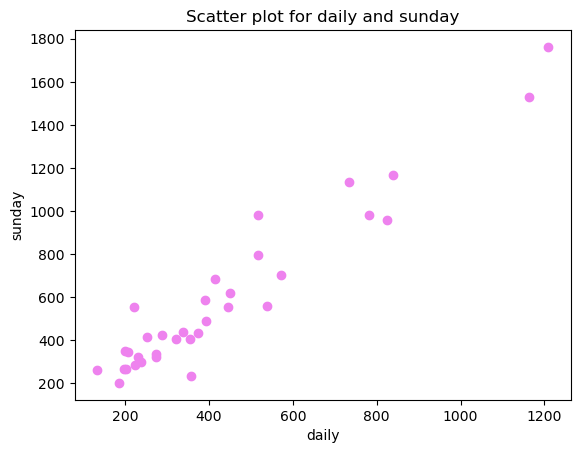

In [10]:
plt.scatter(x=dt1["daily"],y=dt1["sunday"],color="violet")
plt.xlabel("daily")
plt.title("Scatter plot for daily and sunday")
plt.ylabel("sunday")
plt.show()

In [11]:
correl=dt1["daily"].corr(dt1["sunday"])
print(f"Pearson correlation coefficient {correl:.5f}")

Pearson correlation coefficient 0.95815


In [12]:
dt1[["daily",'sunday']].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


## Observation
> A high positive correlation is observed between `daily` and `sunday` of value
**0.9581543140785462**

## Scatter plot

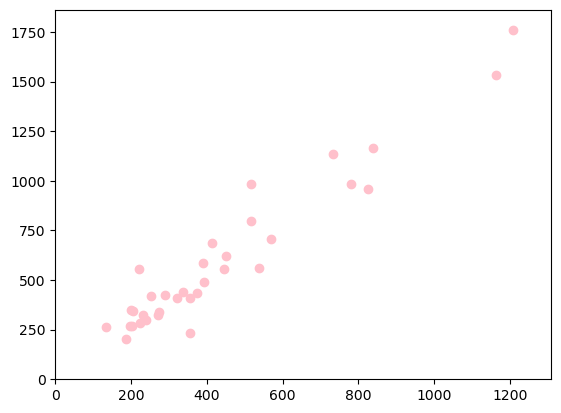

In [13]:
x=dt1["daily"]
y=dt1['sunday']
plt.scatter(dt1['daily'],dt1['sunday'],color='pink')
plt.xlim(0,max(x)+100)
plt.ylim(0,max(y)+100)
plt.show()

## Observations on correlation strength
> The relationship between x(daily) and y(sunday) is seen to be linear as seen from scatter plot

> The correlation is strong and postive with pearson correlation coefficient of 0.958154



In [14]:
import statsmodels.formula.api as smf
model1=smf.ols('sunday~daily',data=dt1).fit()

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        10:46:26   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observations from model summary
>The probability (p-value) for intercept (beta_0) is .707>.05

> Therefore the intercept coeffient may not be that much significant in preducation

> However the p-value for "daily" (beta_1) is 0<.05

> Therefore the beta_1 coeffient is highly significant and is contributing to predication


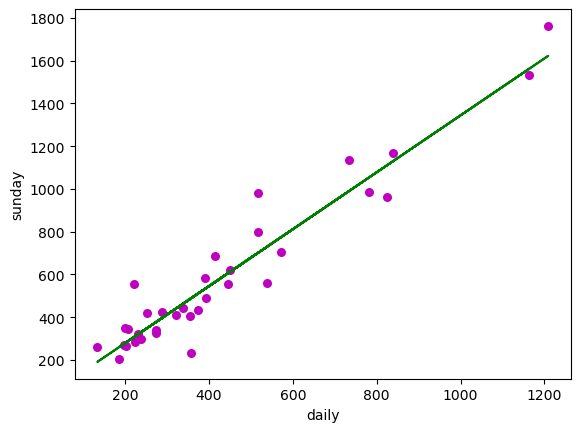

In [18]:
# plot thr scatter plot and overlay the fitted straight line
x=dt1["daily"].values
y=dt1["sunday"].values
plt.scatter(x,y,color='m',marker='o',s=30)
b0=13.84
b1=1.33
# predicted response vector
y_hat=b0+b1*x

#plotting the regression line
plt.plot(x,y_hat,color='g')
plt.xlabel('daily')
plt.ylabel('sunday')
plt.show()


In [19]:
model1.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [20]:
# print model statictics (t and p-values)
print(f"model t-values:\n{model1.tvalues}\n-------------\nmodel p-values: \n{model1.pvalues}")


model t-values:
Intercept     0.386427
daily        18.934840
dtype: float64
-------------
model p-values: 
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [22]:
#print the quality of fitted line(R squared values)
(model1.rsquared,model1.rsquared_adj)


(0.9180596895873295, 0.9154990548869336)

In [23]:
#predict for 200 and 300 daily circulations
newdt=pd.Series([200,300,1500])


In [25]:
dt_pred=pd.DataFrame(newdt,columns=['daily'])
print(dt_pred)


   daily
0    200
1    300
2   1500


In [26]:
model1.predict(dt_pred)

0     281.778581
1     415.750057
2    2023.407766
dtype: float64

In [33]:
# Predict on all given training data
pred=model1.predict(dt1['daily'])
pred

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [34]:
#Add predicted values as column in dt1
dt1['Y_hat']=pred
dt1

,Newspaper,daily,sunday,Y_hat
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [60]:
dt1["Errors"]=dt1['sunday']-dt1["Y_hat"]
print(dt1)


                         Newspaper     daily    sunday        Y_hat  \
0                    Baltimore Sun   391.952   488.506   538.939509   
1                     Boston Globe   516.981   798.298   706.442705   
2                    Boston Herald   355.628   235.084   490.275710   
3               Charlotte Observer   238.555   299.451   333.431284   
4                Chicago Sun Times   537.780   559.093   734.307432   
5                  Chicago Tribune   733.775  1133.249   996.884826   
6              Cincinnati Enquirer   198.832   348.744   280.213795   
7                      Denver Post   252.624   417.779   352.279731   
8              Des Moines Register   206.204   344.522   290.090172   
9                 Hartford Courant   231.177   323.084   323.546868   
10               Houston Chronicle   449.755   620.752   616.379041   
11                Kansas City Star   288.571   423.305   400.438457   
12         Los Angeles Daily  News   185.736   202.614   262.668890   
13    

In [51]:
mse=np.mean((dt1["daily"]-dt1["Y_hat"])**2)
rmse=np.sqrt(mse)
print("MSE: ",mse)
print('RMSE: ',rmse)


MSE:  33794.87469205267
RMSE:  183.83382358002748
